In [19]:
import pandas as pd
import numpy as np
import scipy
import pylab as pl
import sklearn as sk
import seaborn as sns
import statsmodels.api as sm
from IPython.display import display
%matplotlib inline

In [98]:
# import util file
import sys
sys.path.insert(0,'/Users/arianisfeld/Documents/Presence Health/Healthviz/')
from analytics.util import drop_nan, impute, regression_split

In [4]:
# import data
df = pd.read_csv('HealthViz County Dataset 6 21 17.csv',skiprows=0, header=1, index_col=0, encoding='latin_1')
df.index.name=None

In [ ]:
df.isnull().sum()

In [74]:

#X = df.ix[:,df.columns]
#y = df.ix[:,'Diabetes mortality (deaths per 100,000), 2008-2014']
#w = df.ix[:,'Population (residents), 2011-2015']


In [64]:
def get_resids(y, x_tilde, controls, weight=None):
    if weight is None:
        weight = np.ones(len(y))
    res_x = sm.WLS(x_tilde, controls, 1/weight).fit().resid
    res_y = sm.WLS(y, controls, 1/weight).fit().resid
    return res_x, res_y
    

def added_variable_plot(df, y_name,x_tilde_name,w_name=None, exclude=['County'], X_names=None, verbose = True):
    controls, x_tilde, y, w = regression_split(df, y_name,w_name=w_name,exclude=exclude, X_names=X_names, x_tilde_name=x_tilde_name)
    res_x, res_y = get_resids(y, x_tilde, controls, weight=w)
    #return res_x, res_y
    if verbose:
        display(sm.WLS(res_y,res_x,1/w).fit().summary())
    
    plot = sns.regplot(res_x, res_y)
    return plot

def regression_plot(df, y_name, x_tilde_name, w_name, exclude=['County'], X_names=None, verbose = True):
    controls, x_tilde, y, w = regression_split(df, y_name,w_name=w_name,exclude=exclude, X_names=X_names, x_tilde_name=x_tilde_name)
    X = pd.concat([controls, x_tilde], axis=1)
    model = sm.WLS(y, X, 1/w).fit()
    
    if verbose:
        display(model.summary())
    
    plot = sns.regplot(x_tilde.squeeze(), y.squeeze())
    
    return plot



<class 'statsmodels.iolib.summary.Summary'>
"""
                                            WLS Regression Results                                            
==============================================================================================================
Dep. Variable:     Diabetes mortality (deaths per 100,000), 2008-2014   R-squared:                       0.003
Model:                                                            WLS   Adj. R-squared:                  0.003
Method:                                                 Least Squares   F-statistic:                     8.310
Date:                                                Wed, 05 Jul 2017   Prob (F-statistic):            0.00398
Time:                                                        16:05:56   Log-Likelihood:                -12829.
No. Observations:                                                2482   AIC:                         2.566e+04
Df Residuals:                                                    2481   BIC:                         2.567e+04
Df Model:                                                           1                                         
Covariance Type:                                            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6074      0.558     -2.883      0.004      -2.701      -0.514
==============================================================================
Omnibus:                     1443.570   Durbin-Watson:                   0.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18198.913
Skew:                           2.519   Prob(JB):                         0.00
Kurtosis:                      15.272   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

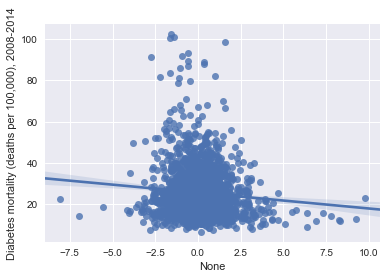

In [97]:
y_n = y[c.index]
sns.regplot(c, y_n)
sm.WLS(y_n, c, 1/wgts).fit().summary()

In [63]:
wgts = w[c.index]
sm.WLS(d,c,1/wgts).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.030
Model:                            WLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     76.19
Date:                Wed, 05 Jul 2017   Prob (F-statistic):           4.63e-18
Time:                        15:42:41   Log-Likelihood:                -10079.
No. Observations:                2482   AIC:                         2.016e+04
Df Residuals:                    2481   BIC:                         2.017e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6074      0.184     -8.729      0.000      -1.968      -1.246
==============================================================================
Omnibus:                     1277.733   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16164.010
Skew:                           2.132   Prob(JB):                         0.00
Kurtosis:                      14.752   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            WLS Regression Results                                            
==============================================================================================================
Dep. Variable:     Diabetes mortality (deaths per 100,000), 2008-2014   R-squared:                       0.891
Model:                                                            WLS   Adj. R-squared:                  0.891
Method:                                                 Least Squares   F-statistic:                     1349.
Date:                                                Wed, 05 Jul 2017   Prob (F-statistic):               0.00
Time:                                                        15:27:10   Log-Likelihood:                -10079.
No. Observations:                                                2482   AIC:                         2.019e+04
Df Residuals:                                                    2467   BIC:                         2.028e+04
Df Model:                                                          15                                         
Covariance Type:                                            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
Population, Non-Hispanic Black (residents), 2011-2015                    5.862e-05   2.65e-05      2.216      0.027    6.75e-06       0.000
Population, Hispanic or Latino (residents), 2011-2015                   -3.392e-05   2.08e-05     -1.634      0.102   -7.46e-05     6.8e-06
Population, Asian or Pacific Islander (residents), 2011-2015                0.0001   6.14e-05      1.988      0.047    1.64e-06       0.000
Median age, 2011-2015                                                      -0.3907      0.045     -8.770      0.000      -0.478      -0.303
Age dependency ratio (Dependents per 100 working-age adults), 2011-2015     0.1410      0.027      5.159      0.000       0.087       0.195
Median household income, 2011-2015                                          0.0003   3.16e-05      8.241      0.000       0.000       0.000
Poverty rate (% of residents), 2011-2015                                    0.6307      0.060     10.479      0.000       0.513       0.749
Share of income, top 5% (% of total income), 2011-2015                      0.4325      0.075      5.763      0.000       0.285       0.580
Dual eligible coverage (% of residents), 2010-2014                         -0.4006      0.196     -2.046      0.041      -0.785      -0.017
College graduation rate (% of residents), 2011-2015                         0.3522      0.092      3.812      0.000       0.171       0.533
Food stamps (SNAP) (% of households), 2011-2015                             0.3929      0.066      5.970      0.000       0.264       0.522
Public assistance income (cash welfare) (% of households), 2011-2015        0.8733      0.139      6.292      0.000       0.601       1.146
Total election votes (Presidential) (votes), 2016                       -6.434e-05   9.52e-06     -6.756      0.000    -8.3e-05   -4.57e-05
Election margin, winner (Presidential) (% margin), 2016                     0.0303      0.012      2.525      0.012       0.007       0.054
Graduate education rate (% of residents), 2011-2015                        -1.6074      0.185     -8.704      0.000      -1.970      -1.245
==============================================================================
Omnibus:                     1277.733   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (

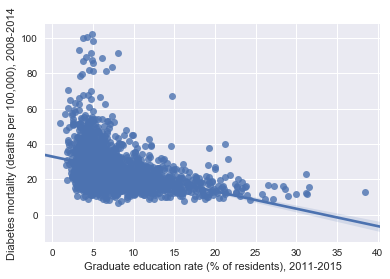

In [44]:
regression_plot(df, y_name=['Diabetes mortality (deaths per 100,000), 2008-2014'], 
     x_tilde_name=['Graduate education rate (% of residents), 2011-2015'], 
     w_name='Population (residents), 2011-2015')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.030
Model:                            WLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     76.19
Date:                Wed, 05 Jul 2017   Prob (F-statistic):           4.63e-18
Time:                        15:44:03   Log-Likelihood:                -10079.
No. Observations:                2482   AIC:                         2.016e+04
Df Residuals:                    2481   BIC:                         2.017e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6074      0.184     -8.729      0.000      -1.968      -1.246
==============================================================================
Omnibus:                     1277.733   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16164.010
Skew:                           2.132   Prob(JB):                         0.00
Kurtosis:                      14.752   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

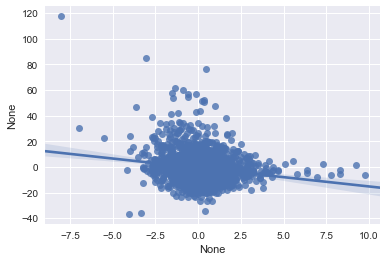

In [65]:
added_variable_plot(df, y_name=['Diabetes mortality (deaths per 100,000), 2008-2014'], 
     x_tilde_name=['Graduate education rate (% of residents), 2011-2015'], 
     w_name='Population (residents), 2011-2015')

In [ ]:
all_X,y,w = regression_split(df, ['Diabetes mortality (deaths per 100,000), 2008-2014'],'Population (residents), 2011-2015')

In [ ]:
all_X,y,w = drop_nan(all_X,y,w)
sm.WLS(y,all_X,1/w).fit().summary()

In [ ]:
X, X_tilde, void = regression_split(all_X, ["Poverty rate (% of residents), 2011-2015"])

In [ ]:
partial_X = sm.WLS(X_tilde, X,1/w).fit()
partial_y = sm.WLS(y, X,1/w).fit()

pred_y = partial_y.predict()
pred_X = partial_X.predict()

resid_y = partial_y.resid
resid_X = partial_X.resid


In [ ]:
sns.regplot(pred_X, pred_y)

In [ ]:
sns.regplot(resid_X, resid_y)

In [ ]:
sns.regplot(x='Poverty rate (% of residents), 2011-2015', y='Diabetes mortality (deaths per 100,000), 2008-2014',data=df)